# **1. Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# **2. Load & Explore the Data**

In [2]:
df = pd.read_csv('/content/hotel_bookings.csv')

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0.0,Transient,98.0,0.0,1.0,Check-Out,2015-07-03


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29066 entries, 0 to 29065
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           29066 non-null  object 
 1   is_canceled                     29066 non-null  int64  
 2   lead_time                       29066 non-null  int64  
 3   arrival_date_year               29066 non-null  int64  
 4   arrival_date_month              29066 non-null  object 
 5   arrival_date_week_number        29066 non-null  int64  
 6   arrival_date_day_of_month       29066 non-null  int64  
 7   stays_in_weekend_nights         29066 non-null  int64  
 8   stays_in_week_nights            29066 non-null  int64  
 9   adults                          29066 non-null  int64  
 10  children                        29066 non-null  int64  
 11  babies                          29066 non-null  int64  
 12  meal                            

In [5]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,29066.000000,29066.000000,29066.000000,29066.000000,29066.000000,29066.000000,29066.000000,29066.000000,29066.000000,29066.000000,29066.000000,29066.000000,29066.000000,29066.000000,23116.000000,2342.000000,29065.000000,29065.000000,29065.000000,29065.000000
mean,0.382268,97.768389,2015.877038,28.076963,15.703709,1.201300,3.162286,1.875353,0.132767,0.013555,0.048786,0.139992,0.185784,0.258928,214.400156,223.556789,0.601135,95.312002,0.122243,0.560606
std,0.485950,99.053190,0.658795,13.351868,8.876778,1.145875,2.451494,0.770330,0.455887,0.117116,0.215423,1.565645,1.157698,0.688939,84.032248,114.600772,7.937538,60.760930,0.335049,0.781651
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,13.000000,2015.000000,17.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,208.000000,135.000000,0.000000,50.400000,0.000000,0.000000
50%,0.000000,65.000000,2016.000000,30.000000,16.000000,1.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,223.000000,0.000000,76.430000,0.000000,0.000000
75%,1.000000,162.000000,2016.000000,39.000000,24.000000,2.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,242.000000,291.000000,0.000000,127.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,2.000000,1.000000,26.000000,30.000000,17.000000,531.000000,543.000000,150.000000,508.000000,8.000000,5.000000


# **3. Identifying all missing values**

In [6]:
missing_values_count = df.isnull().sum()

print(missing_values_count)

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              0
babies                                0
meal                                  0
country                             461
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              5950
company                           26724


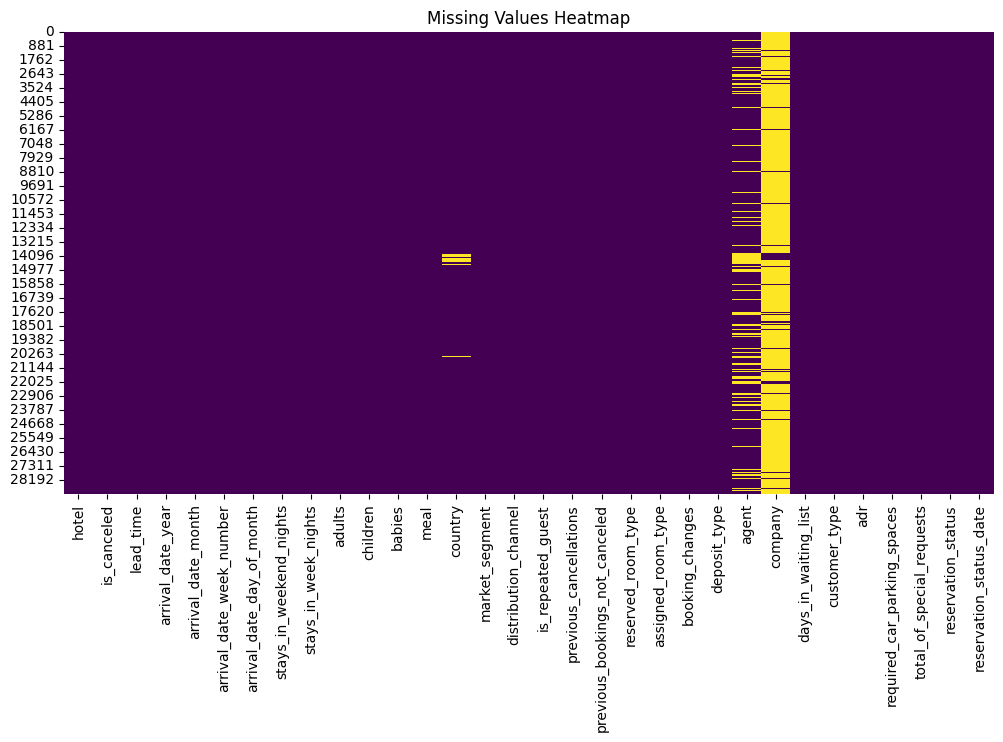

In [7]:
# Visualize missing values using seaborn
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

# **4. Outlier Detection**

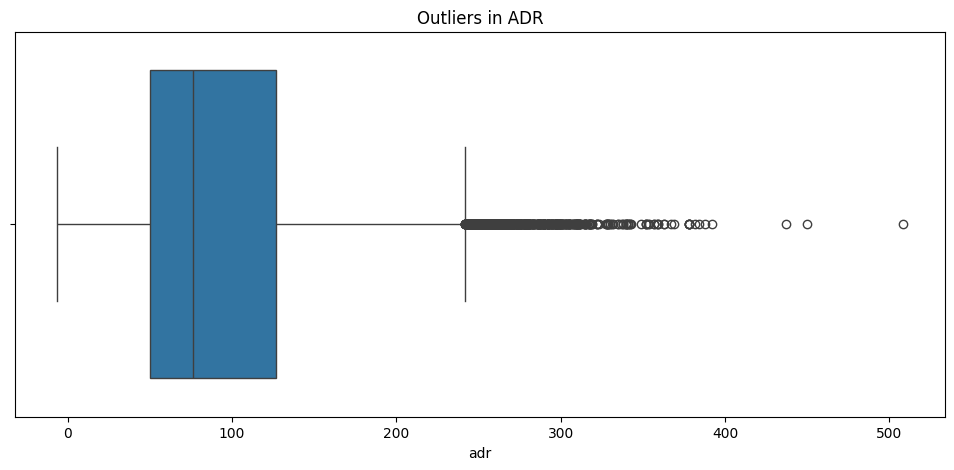

In [8]:
# Boxplots for key numerical columns
plt.figure(figsize=(12,5))
sns.boxplot(x=df["adr"])
plt.title("Outliers in ADR")
plt.show()

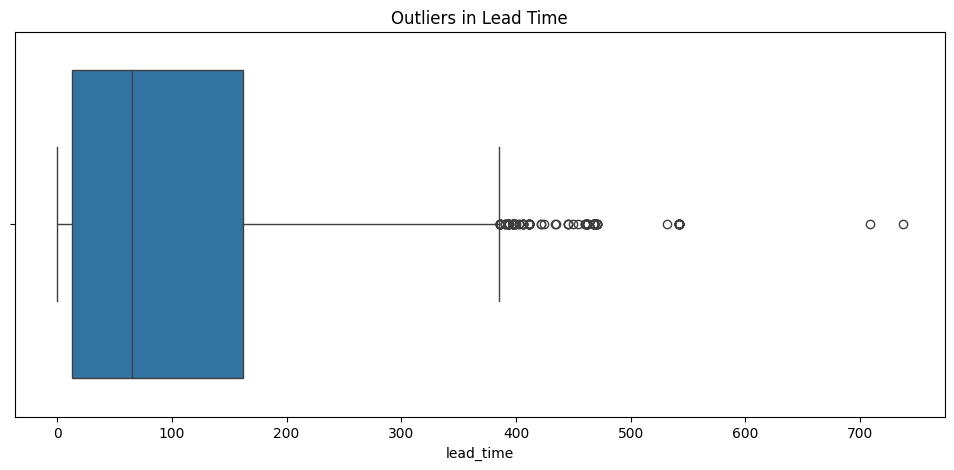

In [9]:
plt.figure(figsize=(12,5))
sns.boxplot(x=df["lead_time"])
plt.title("Outliers in Lead Time")
plt.show()

# **5. Data Cleaning**

In [10]:
# Fill missing values
df["company"] = df["company"].fillna(0)
df["agent"] = df["agent"].fillna(0)
df["country"] = df["country"].fillna(df["country"].mode()[0])
df["children"] = df["children"].fillna(df["children"].median())

In [11]:
# Remove duplicates
df = df.drop_duplicates()

In [12]:
# Handle Outliers
df.loc[df["adr"] > 1000, "adr"] = 1000

In [13]:
# Convert date columns to datetime
df["reservation_status_date"] = pd.to_datetime(df["reservation_status_date"])

# **6. Feature Engineering**

In [14]:
# Create new features
df["total_guests"] = df["adults"] + df["children"] + df["babies"]
df["total_nights"] = df["stays_in_weekend_nights"] + df["stays_in_week_nights"]
df["is_family"] = np.where((df["children"] + df["babies"]) > 0, 1, 0)

# **7. Encoding Categorical Variables**

In [15]:
# Drop leakage columns
df = df.drop(["reservation_status", "reservation_status_date"], axis=1)

# One-hot encoding for low-cardinality categorical features
df = pd.get_dummies(df, columns=["meal", "market_segment", "distribution_channel"], drop_first=True)

# Frequency encoding for country (high-cardinality feature)
country_freq = df["country"].value_counts().to_dict()
df["country"] = df["country"].map(country_freq)

# **8. Train-Test Split**

In [16]:
# Define X and y (assuming target = is_canceled)
X = df.drop("is_canceled", axis=1)
y = df["is_canceled"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (19259, 41)
Testing set shape: (4815, 41)
